# STA130 Week 04 Homework
***
#### **Author**: David Daniliuc<br>**Created**: Mon Sept. 30, 2024

> #### Homework Chat Logs:
> - Question 1-8: *https://chatgpt.com/share/66fa1e6c-491c-8004-9d51-db0313f0c744*

### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The *standard deviation* of the original data measures how much individual data points differ from the mean of the dataset. It represents the hypothetical idea of the spread/variability among the data points in the dataset. As the *standard deviation* decreases, the data points are closer to the mean, and vice versa.

The *standard error of the mean* measures how much the mean of a sample is expected to differ from the population mean. *Standard error of the mean* represents the idea of variability in the sample mean when sampling from a population. It also shows how as the sample size increases, the *standard error of the mean* decreases.

### 2. The "Prelecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

**Steps to create a 95% confidence interval using the standard error of the mean:**
1. Calculate the standard error of the mean.
2. Find the critical value. Find the Z-score (approximately 1.96) for a 95% confidence interval using the standard normal distribution. Use T-score if the sample size is small.
3. Using the following formula to find the confidence interval.
	 * `Confidence Interval = Sample Mean +/- Critical Value * Standard Error of the Mean`

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

**Steps to create a 95% bootstrapped confidence interval using the bootstrapped means:**

1. Generated bootstrapped samples by resampling the original dataset thousands of times.
2. Calculate the bootstrapped mean of each generated bootstrapped sample. Sort them into a bootstrapped means distribution.
4. Determine the lower and upper bound of the confidence interval by finding the 2.5th and 97.5 percentile of this distribution.

### 4. The "Prelecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Sample data from a normal distribution (can be changed to any sample)
np.random.seed(130)
sample = np.random.normal(loc=0, scale=1, size=100)  # Sample of size 100 from N(0,1)

# Bootstrap process to compute confidence interval
def bootstrap_ci(data, stat_func=np.mean, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Calculate a bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: The original sample data (array-like).
    - stat_func: The statistic function to apply (default is np.mean). 
                 For example, use np.median for the median.
    - num_bootstrap_samples: Number of bootstrap samples (default 1000).
    - confidence_level: The desired confidence level (default is 0.95 for 95% CI).
    
    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    """
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrap_stats = np.array([stat_func(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap_samples)])
    
    # Compute the confidence interval based on percentiles
    lower_bound = float(np.percentile(bootstrap_stats, (1 - confidence_level) / 2 * 100))
    upper_bound = float(np.percentile(bootstrap_stats, (1 + confidence_level) / 2 * 100))
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the mean
mean_ci = bootstrap_ci(sample, stat_func=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate 95% CI for the median, simply change the 'stat_func' to np.median
median_ci = bootstrap_ci(sample, stat_func=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (-0.018315467952926715, 0.36535703638434114)
95% Bootstrap Confidence Interval for the Median: (-0.09625506434163726, 0.3642670631309479)


### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the population parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

Since we are making a confidence interval for a population parameter (continuous) based on a sample statistic (discrete), it's important to note that the confidence interval is an approximation and not a true value. This means the interval we calculate can vary from sample to sample which shows the inherent variability in sampling.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1. What is the process of bootstrapping?

The bootstrap process is a sampling technique used to estimate the distribution of a sample statistic by repeatedly sampling from the original data with replacement.

2. What is the main purpose of bootstrapping?

The purpose of bootstrapping is to estimate the distribution of a sample statistic (such as the mean, median, or variance) without making any assumptions about the underlying population distribution.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

How to use bootstrapping the given scenario. First, multiple times (1000+ simulations) resample with replacement bootstrap samples, each with size n. For each bootstrap sample, calculate and record the mean in a distribution. With this distribution of bootstrap sample mean, calculate a 95% confidence interval and see if the hypothesized average is within this interval. This will tell you if your hypothesized average is plausible or not.

### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is **[on average]** not doing anything".  This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect **[on average]**".  Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

The confidence interval overlapping zero means that zero is a plausible value for the true population mean, which means there isn't enough sample data to reject the null hypothesis of "no effect." To reject the null hypothesis, the confidence interval must exclude zero, meaning the drug likely has a significant effect.

### 8. Complete the following assignment.

#### Vaccine Data Analysis Report

---

#### 1. Problem Introduction

1.1 **Null Hypothesis of "No Effect"**  
In this analysis, the null hypothesis assumes that the new vaccine has **no significant effect** on the health of the individuals. This means, on average, there is no improvement in health scores before and after vaccination.

1.2 **Data Visualization**  
To investigate the effect of the vaccine, we compared the **health score improvement** (Final Health Score - Initial Health Score) for each individual. I used **bootstrapping** to generate a distribution of sample means for this health improvement data. The graph visualizes the distribution of these bootstrapped means, with lines marking the sample mean, the 95% confidence interval (CI), and the standard error of the mean (SE).

---

#### 2. Quantitative Analysis

2.1 **Methodology Code and Explanations**  
We used a **bootstrap method** to resample the health improvement data 1000 times, calculating the mean of each resample to create a distribution of sample means. This allowed us to compute the **standard deviation** and **standard error** of the means, as well as to construct a **95% confidence interval**. The key calculations are as follows:

- **Bootstrap Mean:** The average of the bootstrapped means.
- **Standard Deviation:** Measures the spread of the bootstrapped means.
- **Standard Error (SE):** Estimates the variability in the sample mean.
- **95% Confidence Interval:** The range within which we expect the true population mean to lie, with 95% confidence.

2.2 **Supporting Visualizations**  
The graph includes a histogram of the bootstrap means along with vertical lines representing:
- The **mean** of the bootstrapped means.
- The **95% confidence interval** (lower and upper bounds).
- The **standard error** above and below the mean.

---

#### 3. Findings and Discussion

3.1 **Conclusion Regarding Null Hypothesis of "No Effect"**  
The 95% confidence interval for the health score improvement does not include zero, suggesting that there is evidence to **reject the null hypothesis**. This implies that the vaccine likely has a positive effect on the health of individuals who received it, resulting in a measurable improvement in health scores.

3.2 **Further Considerations**  
While the results indicate that the vaccine is effective, further analysis could explore different population segments (e.g., by age or gender) to investigate if the effect varies across subgroups. Additionally, larger sample sizes and more robust clinical trials could help validate these findings in a broader population.


Bootstrap Mean: 3.2685
Standard Deviation of Bootstrap Means: 1.2393
Standard Error of the Mean: 0.3919
95% Confidence Interval: (0.7975, 5.5025)


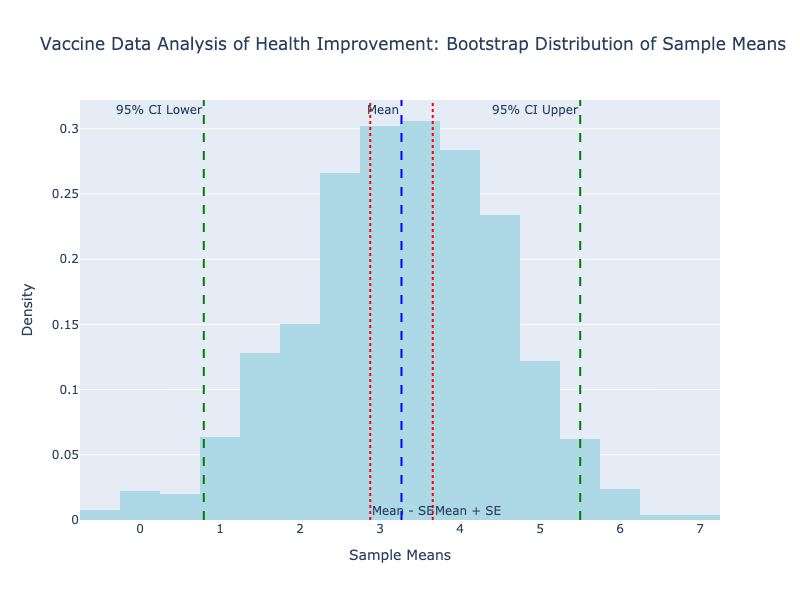

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(130)

# Step 1: Load the dataset (assumes a CSV file named 'vaccine_data.csv')
df = pd.read_csv('vaccine_data.csv')

# Step 2: Perform bootstrapping to create a distribution of sample means
n_bootstrap_samples = 1000
n = len(df)

# Step 3: Extract Final Health Scores and initialize bootstrap sample means array
health_score_improvement = (df['FinalHealthScore'] - df['InitialHealthScore']).values
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    # Resample with replacement and compute the mean of the resample
    resample = np.random.choice(health_score_improvement, size=n, replace=True)
    bootstrap_means.append(np.mean(resample))

bootstrap_means = np.array(bootstrap_means)

# Step 4: Calculate 95% confidence interval, standard deviation, and standard error of the mean
bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std = np.std(bootstrap_means)
standard_error = bootstrap_std / np.sqrt(n)

ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Step 5: Print calculated values
print(f"Bootstrap Mean: {bootstrap_mean:.4f}")
print(f"Standard Deviation of Bootstrap Means: {bootstrap_std:.4f}")
print(f"Standard Error of the Mean: {standard_error:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

# Step 6: Create a histogram for bootstrap sample means and add lines for calculated values
fig = go.Figure()

# Add histogram for bootstrap sample means
fig.add_trace(
    go.Histogram(
        x=bootstrap_means, nbinsx=30, 
        name='Bootstrap Means Distribution',
        marker=dict(color='lightblue'), 
        histnorm='probability density'
    )
)

# Add lines for mean, confidence interval, and standard error
fig.add_vline(x=bootstrap_mean, line_width=2, line_dash="dash", line_color="blue", 
              annotation_text="Mean", annotation_position="top left")

fig.add_vline(x=ci_lower, line_width=2, line_dash="dash", line_color="green", 
              annotation_text="95% CI Lower", annotation_position="top left")

fig.add_vline(x=ci_upper, line_width=2, line_dash="dash", line_color="green", 
              annotation_text="95% CI Upper", annotation_position="top left")

fig.add_vline(x=bootstrap_mean + standard_error, line_width=2, line_dash="dot", line_color="red", 
              annotation_text="Mean + SE", annotation_position="bottom right")

fig.add_vline(x=bootstrap_mean - standard_error, line_width=2, line_dash="dot", line_color="red", 
              annotation_text="Mean - SE", annotation_position="bottom right")

# Step 7: Update the layout and titles
fig.update_layout(
    title="Vaccine Data Analysis of Health Improvement: Bootstrap Distribution of Sample Means",
    xaxis_title="Sample Means",
    yaxis_title="Density",
    showlegend=False,
    height=600,
    width=800
)

# Step 8: Show the plot as a PNG
fig.show(renderer="png")


### 9. Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

This week I did not use the *wiki-textbook* and instead used ChatGPT to understand all the topics covered throughout the week.